<a href="https://colab.research.google.com/github/KellieLeonard-Biostat/WDBC-Dataset/blob/main/unicef_maternal_death_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('MMR.csv')

# Display the first few rows of the dataset
data.head()

# Check for missing data
data.isnull().sum()

# Handle any missing values (e.g., filling with the median or dropping)
# Only calculate the median for numeric columns
numeric_data = data.select_dtypes(include=['number'])
data[numeric_data.columns] = numeric_data.fillna(numeric_data.median())

# Convert year columns to numerical format
years = ['2000', '2005', '2010', '2015', '2020']
for year in years:
    data[year] = pd.to_numeric(data[year], errors='coerce')

# Display the cleaned data
data.head()

,Region,2000,2005,2010,2015,2020
0,East Asia and Pacific,38000,32000,27000,22000,18000
1,Europe and Central Asia,2700,2100,1700,1400,1300
2,Eastern Europe and Central Asia,2200,1700,1400,1100,1000
3,Western Europe,440,390,360,300,290
4,Latin America and Caribbean,10000,9300,8500,7900,8400


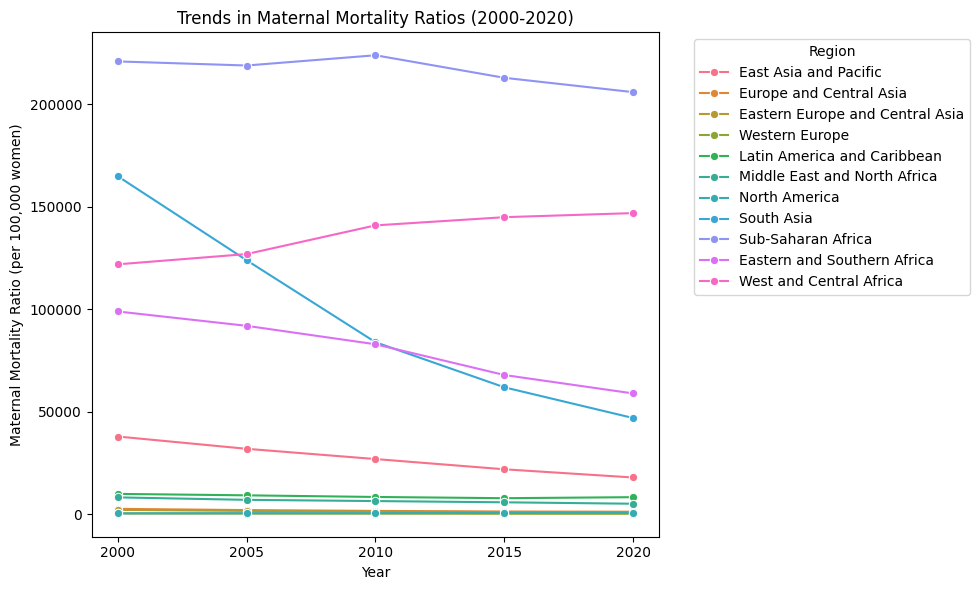

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the dataset for easy plotting
data_melted = data.melt(id_vars='Region', value_vars=years, var_name='Year', value_name='MMR')

# Create a line plot to show trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_melted, x='Year', y='MMR', hue='Region', marker='o')
plt.title('Trends in Maternal Mortality Ratios (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Maternal Mortality Ratio (per 100,000 women)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-6-3a3e1859da17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_2020, x='Region', y='2020', palette='coolwarm')


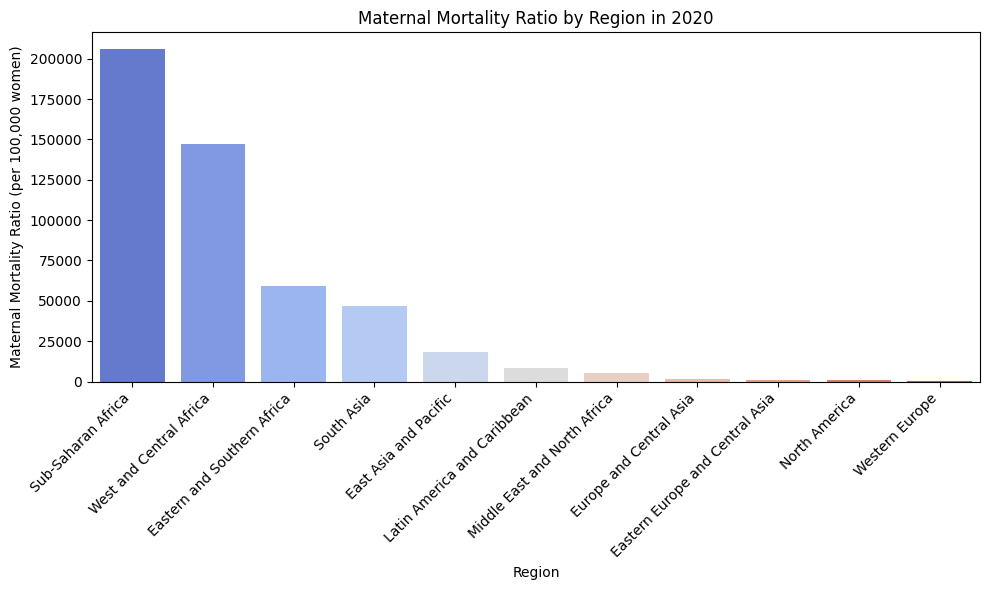

In [ ]:
# Filter data for 2020 and sort by MMR
data_2020 = data[['Region', '2020']].sort_values(by='2020', ascending=False)

# Create a bar plot for 2020 data
plt.figure(figsize=(10, 6))
sns.barplot(data=data_2020, x='Region', y='2020', palette='coolwarm')
plt.title('Maternal Mortality Ratio by Region in 2020')
plt.xlabel('Region')
plt.ylabel('Maternal Mortality Ratio (per 100,000 women)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


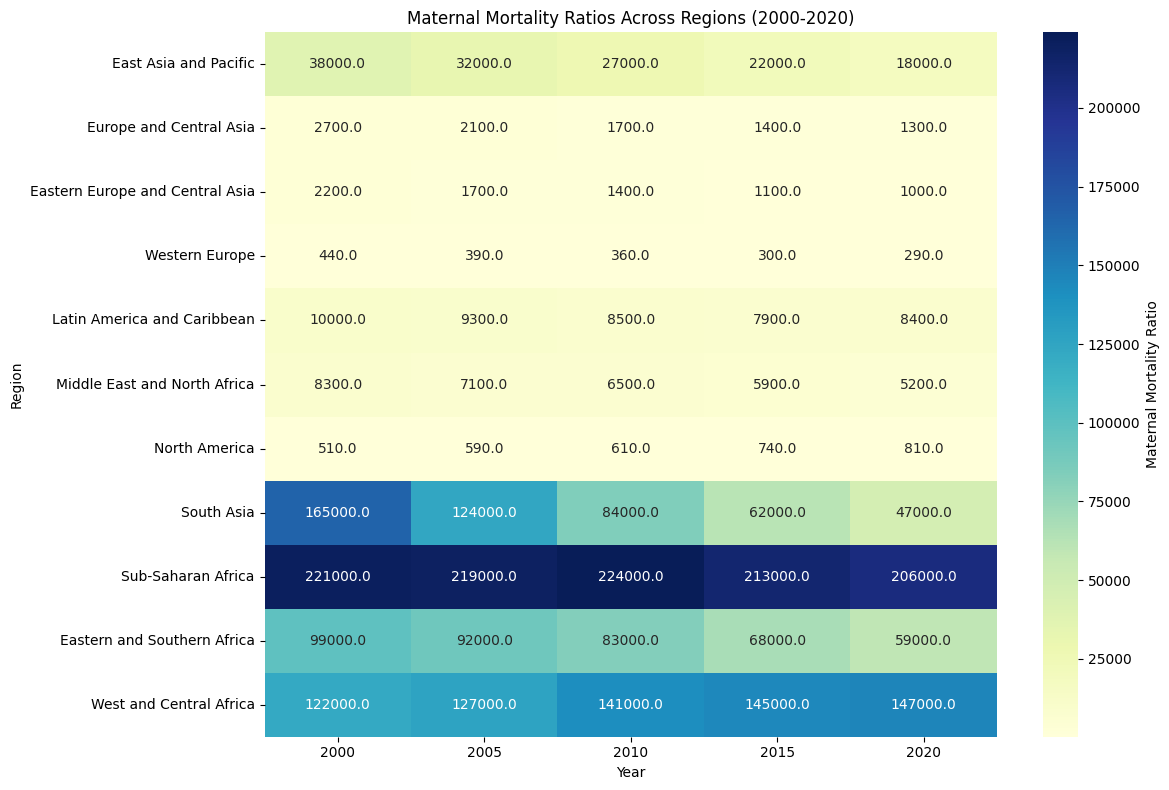

In [ ]:
# Set the 'Region' as index and the years as columns for heatmap
data_heatmap = data.set_index('Region')[years]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_heatmap, annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Maternal Mortality Ratio'})
plt.title('Maternal Mortality Ratios Across Regions (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Region')
plt.tight_layout()
plt.show()
